In [9]:
#Set up imports and data

import tensorflow as tf
import keras as k
import matplotlib.pyplot as plt
import numpy as np

cifar10 = k.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = k.utils.normalize(x_train, axis=1)
x_test = k.utils.normalize(x_test, axis=1)

Image:


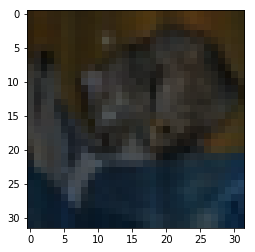

In [12]:
print("Image:")
plt.imshow(x_test[0])
plt.show()

In [27]:
#Set up Neural Network Model and fit it

model = k.models.Sequential()
model.add(k.layers.Flatten())
model.add(k.layers.Dense(1024, activation=tf.nn.relu))
model.add(k.layers.Dense(512, activation=tf.nn.relu))
model.add(k.layers.Dense(10, activation=tf.nn.softmax))

opt = k.optimizers.SGD(lr=0.01)
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
his = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 35s 709us/step - loss: 2.1179 - acc: 0.2335 - val_loss: 2.0505 - val_acc: 0.2654
Epoch 2/5
50000/50000 [==============================] - 35s 703us/step - loss: 1.9845 - acc: 0.2962 - val_loss: 1.9505 - val_acc: 0.3096
Epoch 3/5
50000/50000 [==============================] - 35s 703us/step - loss: 1.9120 - acc: 0.3310 - val_loss: 1.9005 - val_acc: 0.3320
Epoch 4/5
50000/50000 [==============================] - 35s 708us/step - loss: 1.8527 - acc: 0.3533 - val_loss: 1.8481 - val_acc: 0.3499
Epoch 5/5
50000/50000 [==============================] - 43s 853us/step - loss: 1.8018 - acc: 0.3687 - val_loss: 1.7884 - val_acc: 0.3709


10000/10000 [==============================] - 1s 145us/step
Loss value: 1.7883990608215332 and Accuracy: 0.3709
Prediction: 4
Image: [4]


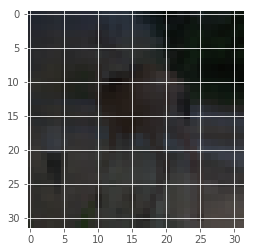

In [29]:
#Test the Neural Network

val_loss, val_acc = model.evaluate(x_test, y_test)
print("Loss value: " + str(val_loss) + " and Accuracy: " + str(val_acc))

pred = model.predict([x_test])
print("Prediction: " + str(np.argmax(pred[100])))
print("Image: "+ str(y_test[100]))
plt.imshow(x_test[100])
plt.show()

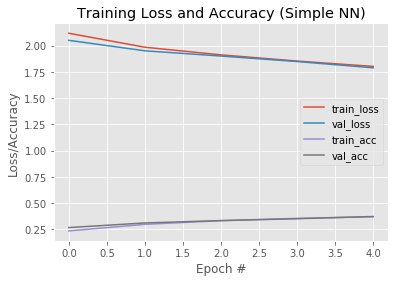

In [31]:
N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["acc"], label="train_acc")
plt.plot(N, his.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()